<a href="https://colab.research.google.com/github/ekremtk/GlobalAIHub/blob/main/UrbanSounds_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Sounds 8K - Model Creating - Running - Evaluating

*   **Google Colab - Google Drive Bağlantısı Kurulur**



In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*   **Kütüphaneler Yüklenir**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os

import tensorflow as tf

* **Veri Kümeleri Yüklenmesi**

In [3]:
X_train = np.load('drive/MyDrive/GlobalAIHub/Project/data/X_train.npy')
X_test = np.load('drive/MyDrive/GlobalAIHub/Project/data/X_test.npy')
X_val = np.load('drive/MyDrive/GlobalAIHub/Project/data/X_val.npy')

y_train = np.load('drive/MyDrive/GlobalAIHub/Project/data/y_train.npy')
y_test = np.load('drive/MyDrive/GlobalAIHub/Project/data/y_test.npy')
y_val = np.load('drive/MyDrive/GlobalAIHub/Project/data/y_val.npy')

In [4]:
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"X_val: {len(X_val)}")

print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")
print(f"y_val: {len(y_val)}")

X_train: 6112
X_test: 1310
X_val: 1310
y_train: 6112
y_test: 1310
y_val: 1310


*   **Model Oluşturulur**

In [5]:
# Model Objesi Oluşturulur
# Doğrusal biçimde oluşturulan katman yığınıdır.

model = tf.keras.Sequential()

In [6]:
# 4 adet 2 boyutlu evrişim katmanı ve her birinin arasına max_pooling katmanı eklenir.

model.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu", input_shape = X_train.shape[1:] ))

model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(128, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

In [7]:
# Düzleştirme katmanı eklenir
# Evrişim katmanlarından gelen çıktı Flatten katmanı ile tek boyutlu hale dönüştürülür.

model.add(tf.keras.layers.Flatten())

In [8]:
# 2 tane tam bağlı ve bırakma katmanı eklenir.
# Bırakma oranı %50 olarak belirlenmiştir.

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [9]:
# Çıkış katmanı eklenir
# 10 Sınıf olduğu için birim sayısı (units) 10 olarak ayarlanır.
# Sınıf tahminin yapabilmek için aktivasyon fonksiyonu softmax olarak tercih edilir.

model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [10]:
# Model tamamlanır.
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [11]:
# Modelin özeti gösterilir
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

* **Modelin Çalıştırılması**

In [12]:
# Model 20 defa (epoch) 128 parça boyutu (batch size) ile çalıştırılır

Model_Results = model.fit(X_train, y_train, batch_size = 128, epochs = 20, validation_data = (X_val, y_val))

Epoch 1/20
48/48 [==============================] - 72s 1s/step - loss: 2.7706 - accuracy: 0.1446 - val_loss: 2.1581 - val_accuracy: 0.2511
Epoch 2/20
48/48 [==============================] - 71s 1s/step - loss: 2.1577 - accuracy: 0.1911 - val_loss: 1.9359 - val_accuracy: 0.3275
Epoch 3/20
48/48 [==============================] - 71s 1s/step - loss: 2.0521 - accuracy: 0.2323 - val_loss: 1.7968 - val_accuracy: 0.3542
Epoch 4/20
48/48 [==============================] - 71s 1s/step - loss: 1.9988 - accuracy: 0.2521 - val_loss: 1.7628 - val_accuracy: 0.4229
Epoch 5/20
48/48 [==============================] - 71s 1s/step - loss: 1.9400 - accuracy: 0.2726 - val_loss: 1.6630 - val_accuracy: 0.4107
Epoch 6/20
48/48 [==============================] - 71s 1s/step - loss: 1.8956 - accuracy: 0.2832 - val_loss: 1.6683 - val_accuracy: 0.4153
Epoch 7/20
48/48 [==============================] - 71s 1s/step - loss: 1.8632 - accuracy: 0.3012 - val_loss: 1.5132 - val_accuracy: 0.5061
Epoch 8/20
48/48 [==

* **Modelin Sonuçlarının Görselleştirilmesi**

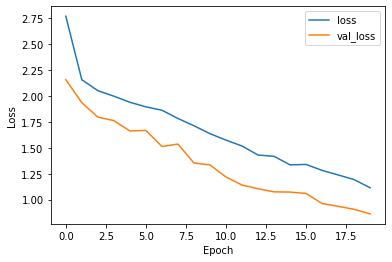

In [13]:
# Eğitim kaybı çizdilir
plt.plot(Model_Results.history["loss"], label = "loss")

# Doğrulama kaybı çizdirilir
plt.plot(Model_Results.history["val_loss"], label = "val_loss")

# X ve Y eksenleri isimlendirilir
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Lejant tablosu çizim üstüne eklenir
plt.legend()

# Çizim gösterilir
plt.show()

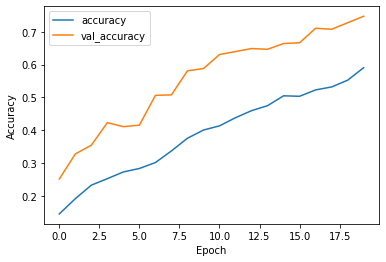

In [14]:
# Eğitim doğruluğu çizdilir
plt.plot(Model_Results.history["accuracy"], label = "accuracy")

# Doğrulama doğruluğu çizdirilir
plt.plot(Model_Results.history["val_accuracy"], label = "val_accuracy")

# X ve Y eksenleri isimlendirilir
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Lejant tablosu çizim üstüne eklenir
plt.legend()

# Çizim gösterilir
plt.show()

* **Test Verisi Üzerinde Model Performansının Değerlendirilmesi**

In [15]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 4s 99ms/step - loss: 0.9001 - accuracy: 0.7305


[0.9000938534736633, 0.7305343747138977]



---



---



---



*   **Başka Bir Model Oluşturulur**

In [33]:
# Model Objesi Oluşturulur
# Doğrusal biçimde oluşturulan katman yığınıdır.

model = tf.keras.Sequential()

In [34]:
# 5 adet 2 boyutlu evrişim katmanı ve her birinin arasına max_pooling katmanı eklenir.

model.add(tf.keras.layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu", input_shape = X_train.shape[1:] ))

model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(128, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(256, kernel_size = (3, 3), strides = (1, 1),
                                 padding = "same", activation = "relu"))

In [35]:
# Düzleştirme katmanı eklenir
# Evrişim katmanlarından gelen çıktı Flatten katmanı ile tek boyutlu hale dönüştürülür.

model.add(tf.keras.layers.Flatten())

In [36]:
# 2 tane tam bağlı ve bırakma katmanı eklenir.
# Bırakma oranı %50 olarak belirlenmiştir.

model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [37]:
# Çıkış katmanı eklenir
# 10 Sınıf olduğu için birim sayısı (units) 10 olarak ayarlanır.
# Sınıf tahminin yapabilmek için aktivasyon fonksiyonu softmax olarak tercih edilir.

model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [38]:
# Model tamamlanır.
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [39]:
# Modelin özeti gösterilir
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 64)      

* **Modelin Çalıştırılması**

In [40]:
# Model 30 defa (epoch) 128 parça boyutu (batch size) ile çalıştırılır

Model_V2_Results = model.fit(X_train, y_train, batch_size = 128, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
48/48 [==============================] - 51s 1s/step - loss: 2.5997 - accuracy: 0.1176 - val_loss: 2.2439 - val_accuracy: 0.1466
Epoch 2/30
48/48 [==============================] - 50s 1s/step - loss: 2.2365 - accuracy: 0.1558 - val_loss: 2.0890 - val_accuracy: 0.2466
Epoch 3/30
48/48 [==============================] - 50s 1s/step - loss: 2.1565 - accuracy: 0.1859 - val_loss: 1.9881 - val_accuracy: 0.2885
Epoch 4/30
48/48 [==============================] - 50s 1s/step - loss: 2.0616 - accuracy: 0.2299 - val_loss: 1.9202 - val_accuracy: 0.3145
Epoch 5/30
48/48 [==============================] - 50s 1s/step - loss: 1.9862 - accuracy: 0.2624 - val_loss: 1.8271 - val_accuracy: 0.3748
Epoch 6/30
48/48 [==============================] - 50s 1s/step - loss: 1.9235 - accuracy: 0.2952 - val_loss: 1.7084 - val_accuracy: 0.4153
Epoch 7/30
48/48 [==============================] - 50s 1s/step - loss: 1.8395 - accuracy: 0.3195 - val_loss: 1.6553 - val_accuracy: 0.4542
Epoch 8/30
48/48 [==

* **Modelin Sonuçlarının Görselleştirilmesi**

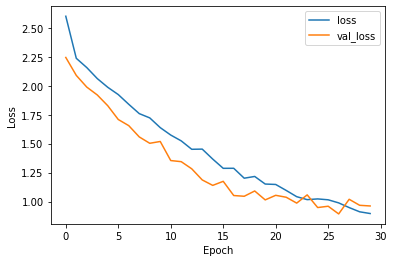

In [41]:
# Eğitim kaybı çizdilir
plt.plot(Model_V2_Results.history["loss"], label = "loss")

# Doğrulama kaybı çizdirilir
plt.plot(Model_V2_Results.history["val_loss"], label = "val_loss")

# X ve Y eksenleri isimlendirilir
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Lejant tablosu çizim üstüne eklenir
plt.legend()

# Çizim gösterilir
plt.show()

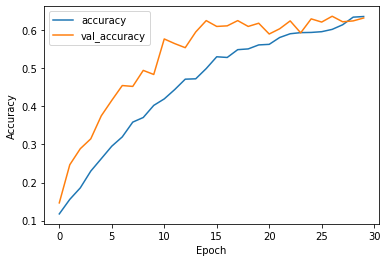

In [42]:
# Eğitim doğruluğu çizdilir
plt.plot(Model_V2_Results.history["accuracy"], label = "accuracy")

# Doğrulama doğruluğu çizdirilir
plt.plot(Model_V2_Results.history["val_accuracy"], label = "val_accuracy")

# X ve Y eksenleri isimlendirilir
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Lejant tablosu çizim üstüne eklenir
plt.legend()

# Çizim gösterilir
plt.show()

* **Test Verisi Üzerinde Model Performansının Değerlendirilmesi**

In [43]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 3s 70ms/step - loss: 1.0086 - accuracy: 0.6351


[1.008561134338379, 0.6351144909858704]